Problem Statement:

4b. Implement a solution for a Constraint Satisfaction Problem using Branch and Bound and 
Backtracking for a graph coloring problem.

In [49]:
import matplotlib.pyplot as plt
import networkx as nx

In [50]:
# Create a simple graph with just 5 vertices
edges = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]

# Create graph
G = nx.Graph()
G.add_edges_from(edges)

# Define colors for visualization
color_map = ["red", "green", "blue"]

In [51]:
# Function to visualize the graph coloring
def visualize_graph(G, colors, step_num, node=None, status=None):
    plt.figure(figsize=(9, 5))  # Wider figure for better spacing
    
    # Create a subplot layout to reserve space for legend
    plt.subplot(1, 6, (1, 5))  # Main graph uses 5/6 of the width
    
    pos = nx.spring_layout(G, seed=42)
    
    # Set node colors
    node_colors = ['lightgray' if colors[v] == -1 else color_map[colors[v]] for v in range(len(colors))]
    
    # Draw edges
    nx.draw_networkx_edges(G, pos)
    
    # Draw nodes with highlight for current node
    for v in range(len(colors)):
        highlight = v == node
        edgecolor = 'black'
        linewidth = 1
        linestyle = 'solid'
        nodesize = 300  # Default node size
        
        if highlight:
            linewidth = 3
            nodesize = 350  # Slightly larger node size for highlighted nodes
            
            if status == "backtrack":
                edgecolor = 'red'
                linestyle = 'solid'
                # Get neighboring nodes with their colors
                neighbors = list(G.neighbors(node))
                conflict_nodes = [n for n in neighbors if colors[n] == colors[node]]
                if conflict_nodes:
                    conflict_text = f"BACKTRACKING: {color_map[colors[node]]} on node {node} conflicts with node {conflict_nodes[0]}"
                else:
                    conflict_text = f"BACKTRACKING: No valid coloring with {color_map[colors[node]]} on node {node}"
                plt.figtext(0.5, 0.01, conflict_text, ha="center", fontsize=12, 
                          bbox={"facecolor":"red", "alpha":0.3})
            elif status == "valid":
                edgecolor = 'green'
                linestyle = 'solid'
                # Draw a larger green circle around the node for valid colors
                circle = plt.Circle(pos[v], radius=0.09, fill=False, 
                                   edgecolor='green', linestyle='solid', linewidth=2)
                plt.gca().add_patch(circle)
            else:
                # When just checking a vertex - dotted border larger than the node
                edgecolor = 'black'
                linestyle = 'dotted'
                # Draw a larger dotted circle around the node
                circle = plt.Circle(pos[v], radius=0.09, fill=False, 
                                   edgecolor='black', linestyle='dotted', linewidth=2)
                plt.gca().add_patch(circle)
        
        nx.draw_networkx_nodes(G, pos, nodelist=[v], node_color=node_colors[v],
                             edgecolors=edgecolor, linewidths=linewidth, 
                             node_size=nodesize)
    
    # Draw labels
    nx.draw_networkx_labels(G, pos)
    
    # Set title
    if node is not None:
        color_name = color_map[colors[node]] if colors[node] != -1 else "no color"
        if status == "backtrack":
            title = f"Step {step_num}: BACKTRACKING from node {node} (tried {color_name})"
        elif status == "valid":
            title = f"Step {step_num}: Valid {color_name} color for node {node}"
        else:
            title = f"Step {step_num}: Trying {color_name} for node {node}"
    else:
        title = f"Step {step_num}: Final coloring"
    
    plt.title(title)
    plt.axis('off')
    
    # Create a separate area for color legend on the right
    plt.subplot(1, 6, 6)  # Legend uses 1/6 of the width on the right
    plt.axis('off')
    
    # Add color boxes with status in the legend area - all equal size
    box_width = 0.3
    box_height = 0.15
    y_start = 0.8
    y_spacing = 0.25  # More space between boxes
    
    for i, color in enumerate(color_map):
        box_y = y_start - (i * y_spacing)
        
        # Draw color box - all same size
        rect = plt.Rectangle((0.1, box_y), box_width, box_height, 
                            facecolor=color, edgecolor='black')
        plt.gca().add_patch(rect)
        
        # Add color name above box
        plt.text(0.1, box_y + box_height + 0.03, color, fontsize=9)
        
        # Add status if applicable - now to the right of the box
        status_text = ""
        if node is not None and colors[node] != -1:
            if colors[node] == i:
                if status == "valid":
                    status_text = "Selected"
                else:
                    status_text = "Checking"
        
        if status_text:
            plt.text(0.1 + box_width + 0.05, box_y + box_height/2, status_text, 
                    fontsize=9, color='darkblue', fontweight='bold', 
                    va='center')
    
    plt.tight_layout()
    plt.show()

In [52]:
# Check if a color is valid for a vertex
def is_valid(graph, colors, vertex, color):
    # Return False if any neighbor has the same color
    for neighbor in graph.neighbors(vertex):
        if colors[neighbor] == color:
            return False
    return True

In [53]:
# Graph coloring with backtracking and branch and bound
def graph_coloring(graph, num_colors):
    n = graph.number_of_nodes()
    colors = [-1] * n
    step = 1
    
    def backtrack(vertex):
        nonlocal step
        
        # All vertices colored - solution found
        if vertex == n:
            visualize_graph(graph, colors, step)
            return True
            
        # Try each color
        for color in range(num_colors):
            # Show current attempt
            colors[vertex] = color  # Temporarily assign to show in visualization
            visualize_graph(graph, colors, step, vertex)
            step += 1
            
            # Branch and bound - check if valid
            if is_valid(graph, colors, vertex, color):
                # Color already assigned above
                visualize_graph(graph, colors, step, vertex, "valid")
                step += 1
                
                # Recurse to next vertex
                if backtrack(vertex + 1):
                    return True
                
                # BACKTRACKING - undo and try next color
                colors[vertex] = -1
                visualize_graph(graph, colors, step, vertex, "backtrack")
                step += 1
            else:
                # Not valid, reset color
                colors[vertex] = -1
        
        return False  # No solution with current assignments
    
    # Start backtracking from first vertex
    if backtrack(0):
        return colors
    else:
        return None

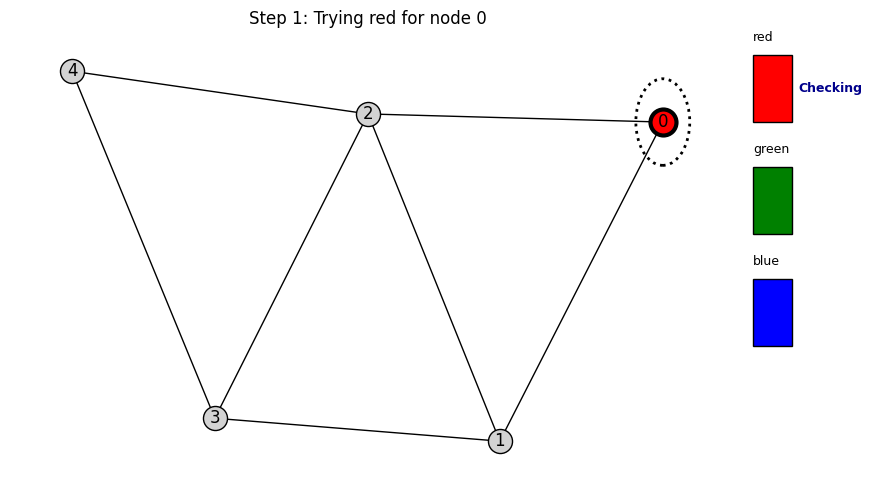

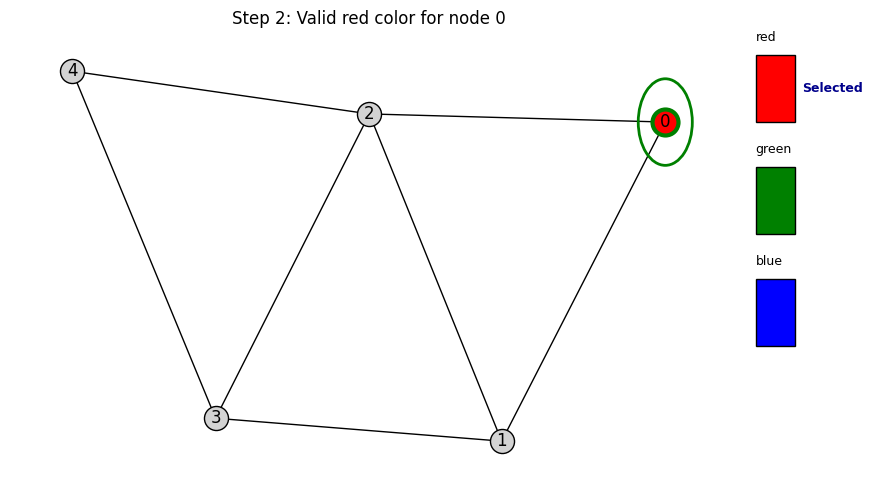

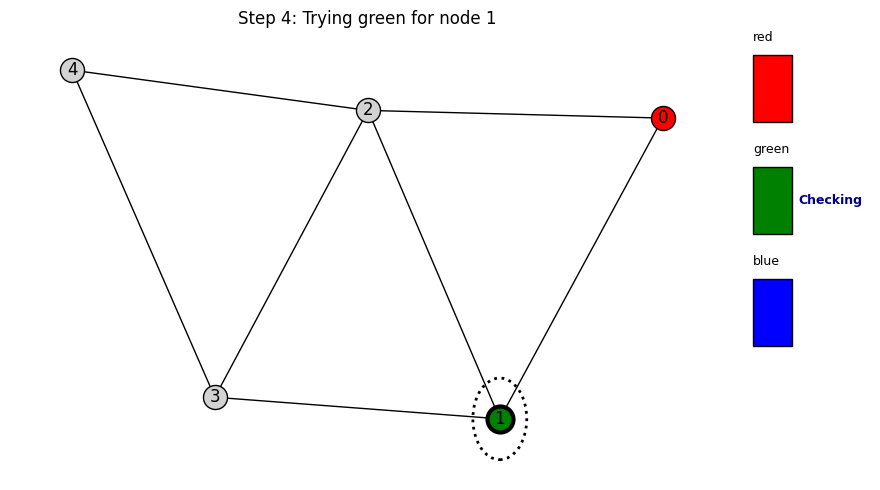

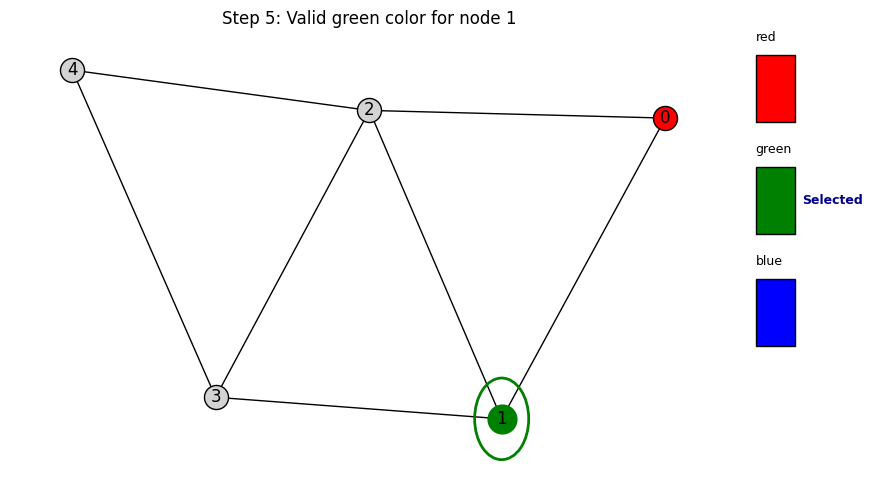

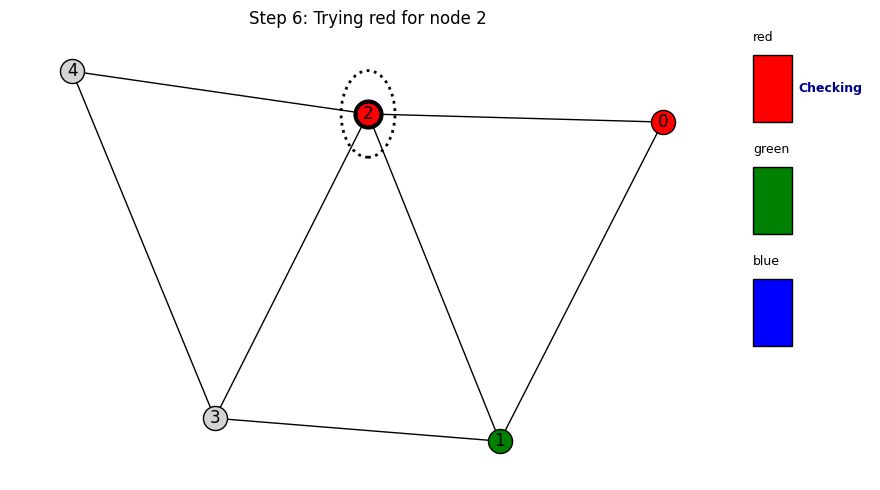

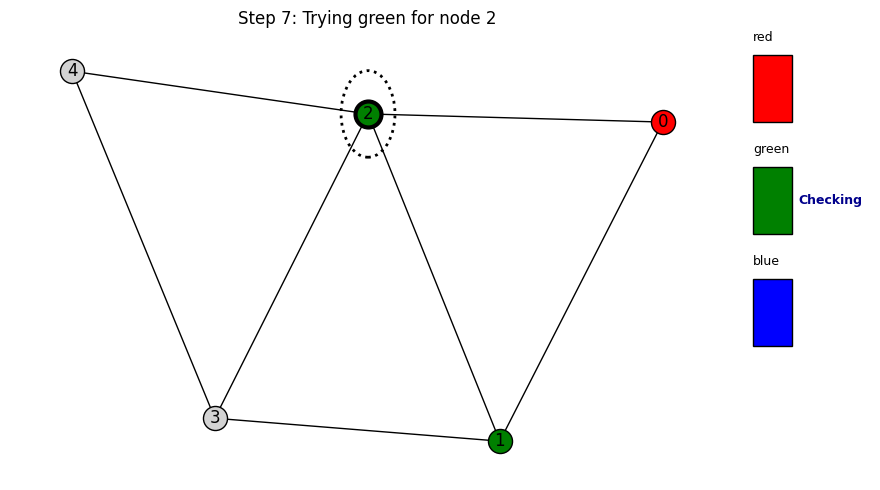

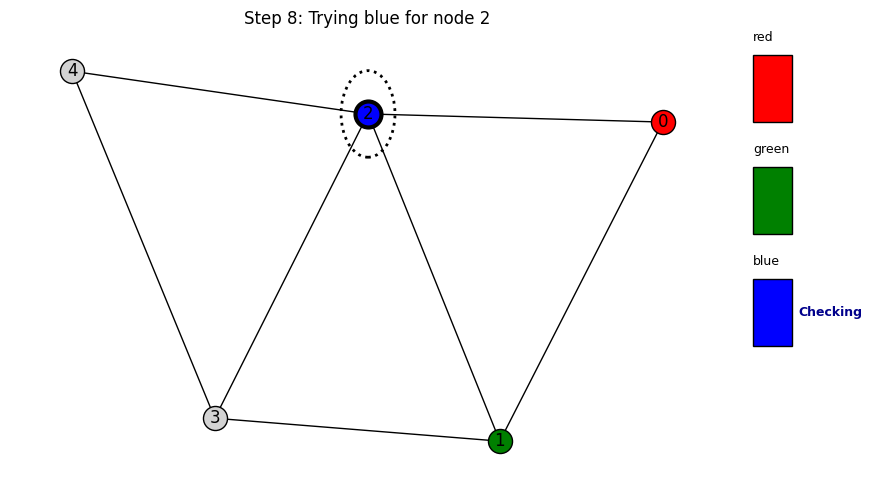

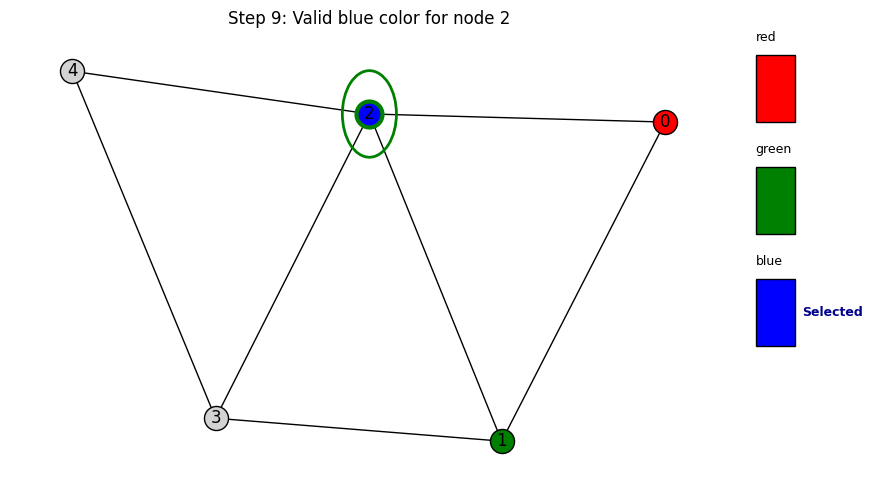

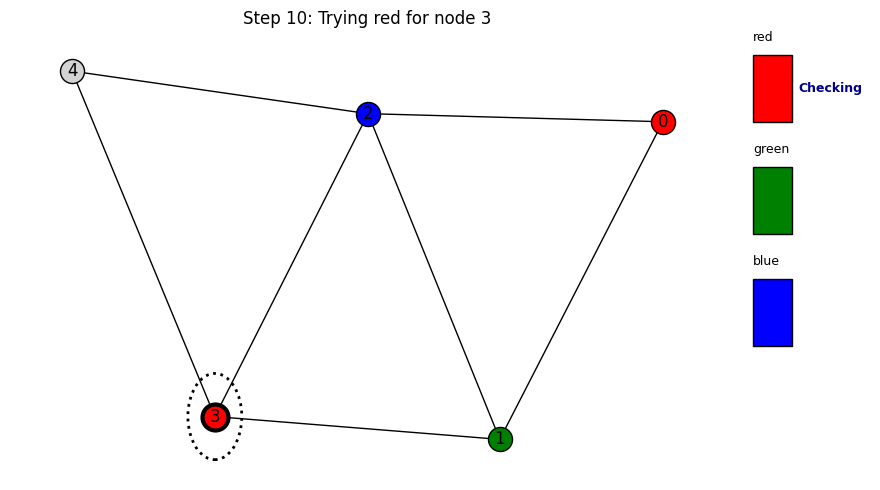

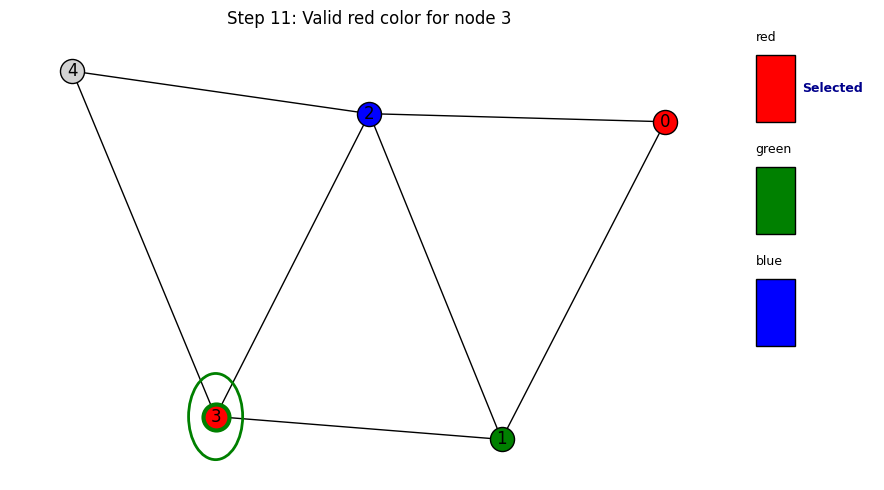

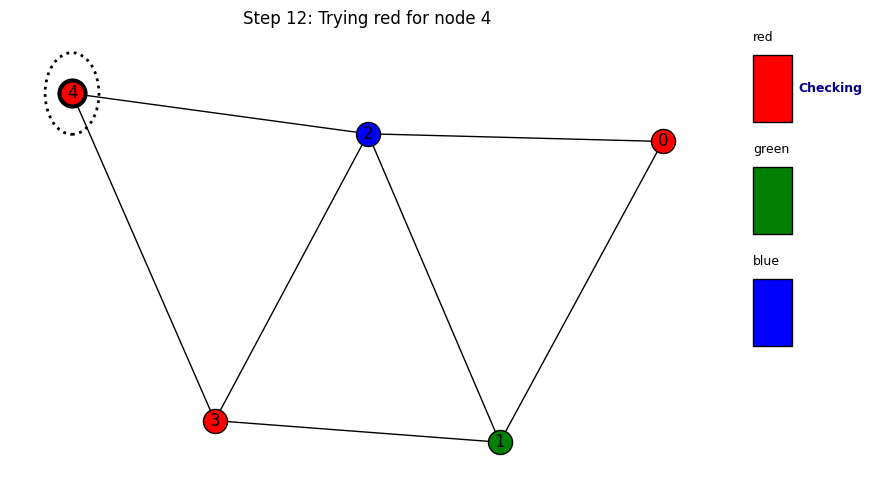

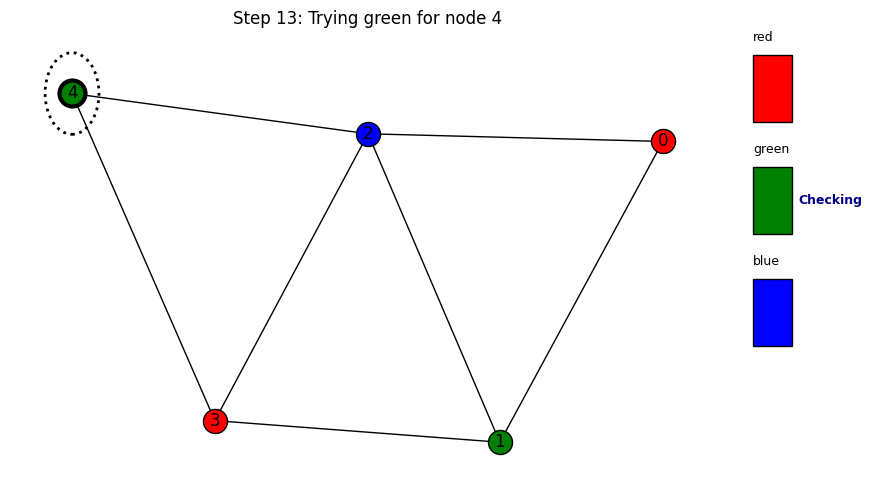

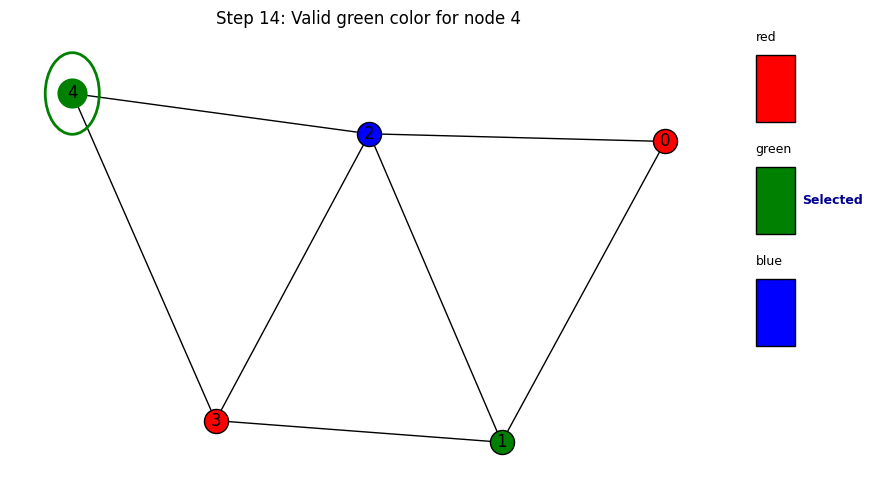

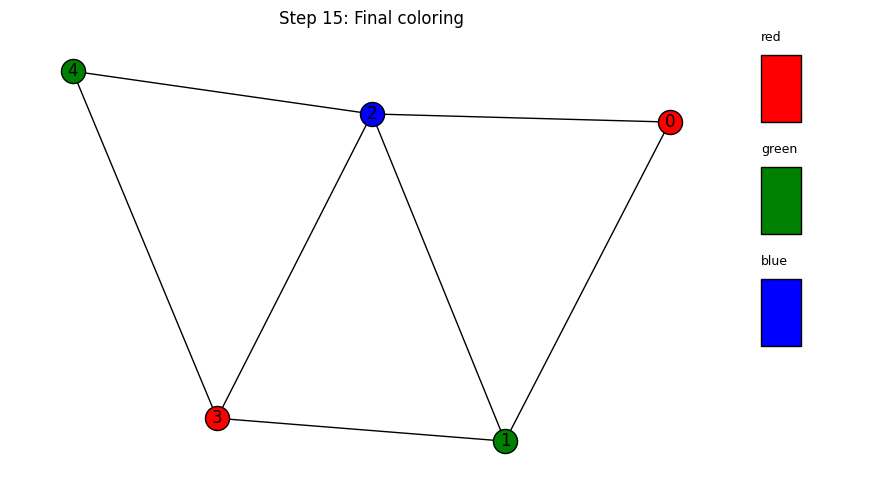

Solution found: [0, 1, 2, 0, 1]
Node 0: red
Node 1: green
Node 2: blue
Node 3: red
Node 4: green


In [54]:
# Solve with 3 colors
solution = graph_coloring(G, 3)

# Print results
if solution:
    print(f"Solution found: {solution}")
    for i, color in enumerate(solution):
        print(f"Node {i}: {color_map[color]}")
else:
    print("No solution exists")

# Graph Coloring Using Backtracking and Branch and Bound

## 1. Aim
To implement and visualize a graph coloring solution using backtracking and branch and bound techniques to efficiently assign colors to vertices such that no adjacent vertices share the same color.

## 2. Objectives
- Demonstrate how constraint satisfaction problems (CSPs) can be solved using backtracking
- Implement branch and bound optimization for the graph coloring problem
- Visualize the step-by-step solution process including valid assignments and backtracking steps
- Understand how graph structures constrain color assignments
- Analyze the algorithm's decision-making process during color assignment

## 3. Expected Output
- A visualization showing the step-by-step coloring of the graph
- Clear indication of when the algorithm tries a color, accepts a valid color, or backtracks
- A final colored graph where no adjacent vertices share the same color
- Console output listing the color assignment for each vertex
- Visual feedback showing conflicts when backtracking occurs

## 4. Prerequisites
- Understanding of graph theory concepts (vertices, edges, adjacency)
- Knowledge of constraint satisfaction problems (CSPs)
- Familiarity with backtracking algorithms
- Basic understanding of Python programming
- Python libraries: NetworkX for graph representation and Matplotlib for visualization

## 5. Theory

### a. Necessary Definitions and Explanations

**Graph Coloring:**
Graph coloring is the assignment of colors to vertices of a graph such that no two adjacent vertices (connected by an edge) share the same color. The minimum number of colors needed to color a graph is called its chromatic number.

**Constraint Satisfaction Problem (CSP):**
A problem defined by a set of variables, their domains, and constraints that specify allowable combinations of values. For graph coloring:
- Variables: Vertices of the graph
- Domain: Available colors (in this case, red, green, blue)
- Constraints: Adjacent vertices must have different colors

**Backtracking:**
A systematic way to try different solutions by incrementally building candidates and abandoning a candidate ("backtracking") as soon as it is determined that the candidate cannot lead to a valid solution.

**Branch and Bound:**
An optimization that prunes search paths that cannot lead to a better solution than the best one found so far, reducing the overall search space.

### b. Computation

The algorithm uses several key computational steps:

1. **State Representation:** The current state is represented by an array `colors` where `colors[v]` indicates the color assigned to vertex `v`, or -1 if unassigned.

2. **Constraint Checking:** For each potential color assignment, the algorithm checks if it's valid by examining all neighbors of the current vertex.

3. **Recursion:** The algorithm recursively attempts to color the next vertex after successfully coloring the current one.

4. **Decision Making:** At each step, the algorithm decides whether to:
   - Proceed to the next vertex (if current assignment is valid)
   - Try another color for the current vertex (if current assignment leads to conflicts)
   - Backtrack to a previous vertex (if all colors for the current vertex lead to conflicts)

5. **Visualization:** The algorithm visualizes each step to show the decision-making process, including:
   - Trying a color
   - Confirming a valid color choice
   - Backtracking when conflicts occur

### c. Algorithms

**Main Algorithm: Graph Coloring with Backtracking**

```python
# Overall structure of the algorithm (pseudocode)
function graph_coloring(graph, num_colors):
    colors = [-1, -1, ..., -1]  # Initialize all vertices as uncolored
    
    function backtrack(vertex):
        if vertex == number_of_vertices:
            return true  # All vertices colored successfully
        
        for each color in available_colors:
            colors[vertex] = color  # Try this color
            
            if is_valid(graph, colors, vertex, color):
                # If successful with this vertex, try next vertex
                if backtrack(vertex + 1):
                    return true
                
            # If we reach here, this color didn't work, reset and try next
            colors[vertex] = -1
        
        return false  # No valid coloring found
    
    return backtrack(0)  # Start with vertex 0
```

**Constraint Checking:**

```python
function is_valid(graph, colors, vertex, color):
    for each neighbor in graph.neighbors(vertex):
        if colors[neighbor] == color:
            return false  # Conflict found
    return true  # No conflicts
```

### d. Example

For the given graph with 5 vertices and edges [(0,1), (0,2), (1,2), (1,3), (2,3), (2,4), (3,4)], we attempt to color it with 3 colors (red, green, blue).

**Example Execution:**
1. Start with vertex 0, try red → valid (no neighbors colored yet)
2. Move to vertex 1, try red → invalid (neighbor 0 is red)
3. Try green for vertex 1 → valid
4. Move to vertex 2, try red → invalid (neighbors 0 and 1 are red and green)
5. Try blue for vertex 2 → valid
6. Continue this process, backtracking when necessary
7. Final coloring might be: [red, green, blue, red, green]

The visualization shows each step, highlighting the current vertex being considered, showing valid color assignments in green, and showing backtracking in red when conflicts occur.

### e. Applications

Graph coloring has numerous practical applications:

1. **Scheduling Problems:** Assigning resources without conflicts (exam scheduling, meeting room allocation)
2. **Register Allocation:** In compiler optimization, assigning a limited number of registers to variables
3. **Frequency Assignment:** Allocating frequencies to radio transmitters to minimize interference
4. **Map Coloring:** Ensuring adjacent regions have different colors
5. **Pattern Recognition:** Segmenting and labeling different regions in images
6. **Sudoku Puzzles:** Each cell must contain a unique digit within its row, column, and box
7. **Task Assignment:** Distributing tasks to workers while respecting constraints
8. **Circuit Board Testing:** Minimizing the number of tests needed by grouping compatible components

## 6. Conclusion

The implementation successfully demonstrates how backtracking and branch and bound techniques can be applied to solve the graph coloring problem. The visualization enhances understanding by showing the step-by-step decision-making process, including valid assignments and backtracking operations.

Key insights from this implementation include:

1. **Algorithmic Efficiency:** Backtracking with constraint checking significantly reduces the search space compared to brute force approaches.

2. **Visualization Importance:** The visual representation provides clear insights into how the algorithm makes decisions and handles conflicts.

3. **Problem Modeling:** Graph coloring effectively models many real-world problems involving resource allocation and constraint satisfaction.

4. **Practical Utility:** The approach can be extended to larger graphs and more complex constraint satisfaction problems.

5. **Educational Value:** This implementation serves as an excellent educational tool for understanding backtracking algorithms, constraint propagation, and search space pruning.

The implemented solution not only correctly colors the graph but also provides a valuable visualization of the algorithm's operation, demonstrating both successful color assignments and the backtracking process when constraints cannot be satisfied.